<a href="https://colab.research.google.com/github/AlexeiAltamira/Portfolio/blob/main/Estimativa_de_n%C3%ADveis_de_obesidade_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação das bibliotécas

In [192]:
# Importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import pandas as pd

In [193]:
# Importando bibliotéca para criação gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
from sklearn.preprocessing import LabelEncoder # Classe para transformar rótulos categóricos em números inteiros.
from sklearn.model_selection import train_test_split # Função para dividir um conjunto de dados em conjuntos de treinamento e teste.
from sklearn.linear_model import LogisticRegression # Classe para realizar regressão logística.
from sklearn.ensemble import RandomForestClassifier  # Classe para construir um modelo de classificação usando um conjunto de árvores de decisão aleatórias.
from sklearn.ensemble import GradientBoostingClassifier # Classe para construir um modelo de classificação usando a técnica de boosting com árvores de decisão.
from sklearn.tree import DecisionTreeClassifier # Classe para construir um modelo de classificação baseado em uma árvore de decisão.
from sklearn.svm import SVC # Classe para construir um modelo de classificação ou regressão usando máquinas de vetores de suporte.
from sklearn.neighbors import KNeighborsClassifier # Classe para construir um modelo de classificação baseado no algoritmo k-vizinhos mais próximos (KNN).
from sklearn.neural_network import MLPClassifier # Classe para construir um modelo de classificação usando uma rede neural perceptron multicamada (MLP).
from sklearn.naive_bayes import MultinomialNB # Classe para construir um modelo de classificação usando o algoritmo Naive Bayes multinomial.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Função para calcular a precisão de um modelo de classificação.
from xgboost import XGBClassifier # Classe para construir um modelo de classificação usando o algoritmo LGBMClassifier

In [195]:
pip install ucimlrepo

# Carregar arquivo

In [196]:
# Origem dos dados: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

# Baixar o repositório com os dados a serem analisados
from ucimlrepo import fetch_ucirepo

#  Buscar conjunto de dados
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Dados (pandas dataframes)
features = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
targets = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets


# Análise dos dados

In [197]:
#Transformar os dados divididos da base em um único dataframe
junto = pd.concat([features, targets], axis=1)

In [198]:
# Verificar se o arquivo a ser analisado esta correto. Podendo ser visualizado as 3 linhas iniciais.
junto.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [199]:
# Verificar e conta se há dados nulos em todas as colunas.
junto.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

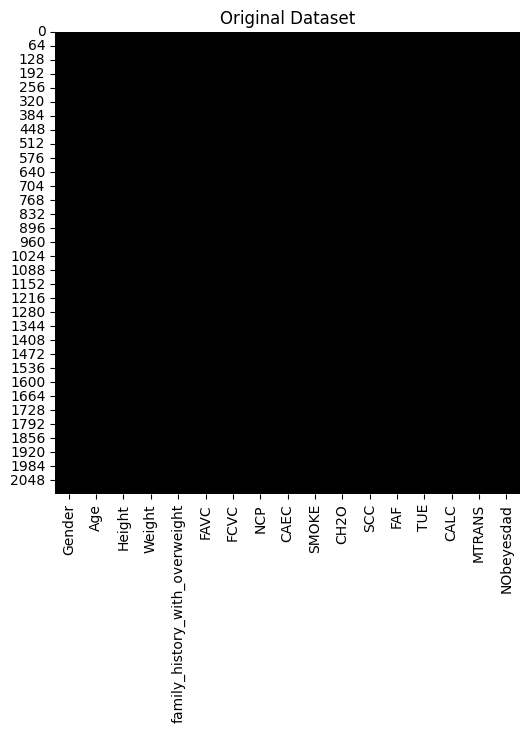

In [200]:
# Create a figure with a single axis
fig, ax = plt.subplots(figsize=(6, 6))

# Visualize null values in original dataset
sns.heatmap(junto.isna(), cmap='gray', cbar=False, ax=ax)
ax.set_title('Original Dataset')
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

In [201]:
# Verificar se há alguma divergência, principalmente no Dtype dos dados.
junto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [202]:
# Verificar visualmente se há algum outliers
junto.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [203]:
# Deixo na coluna 'Age' somente valores inteiros
junto['Age'] = junto['Age'].astype(int)

In [204]:
# Verificar se há linhas com valores duplicados
junto.duplicated().sum()

24

# Pré-processamento

In [205]:
# Mostrar as linhas com valores duplicados
junto[junto.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [206]:
# Exemplo de linhas com dados duplicados
junto[(junto['Age'] == 21) & (junto['Height'] == 1.52) & (junto['Weight'] == 42.0)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
97,Female,21,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
523,Female,21,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
527,Female,21,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
659,Female,21,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
663,Female,21,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight


In [207]:
# Elimina as linhas com dados duplicados
junto = junto.drop_duplicates()

In [208]:
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [209]:
# Usa o Label Encoder para transformar rótulos categóricos em números.
le = LabelEncoder()
junto['Gender'] = le.fit_transform(junto['Gender'])
junto['family_history_with_overweight'] = le.fit_transform(junto['family_history_with_overweight'])
junto['FAVC'] = le.fit_transform(junto['FAVC'])
junto['SMOKE'] = le.fit_transform(junto['SMOKE'])
junto['SCC'] = le.fit_transform(junto['SCC'])
junto['NObeyesdad'] = le.fit_transform(junto['NObeyesdad'])

<ipython-input-209-eca9619ca8d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junto['Gender'] = le.fit_transform(junto['Gender'])
<ipython-input-209-eca9619ca8d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junto['family_history_with_overweight'] = le.fit_transform(junto['family_history_with_overweight'])
<ipython-input-209-eca9619ca8d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [210]:
# Transforma os dados categóricos progressivos em valores
junto['CAEC'] = junto['CAEC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2,'Always': 3})
junto['CALC'] = junto['CALC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2,'Always': 3})
junto['MTRANS'] = junto['MTRANS'].replace({'Bike': 0, 'Walking': 1, 'Public_Transportation': 2, 'Motorbike': 3, 'Automobile': 4})

<ipython-input-210-324e355be164>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junto['CAEC'] = junto['CAEC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2,'Always': 3})
<ipython-input-210-324e355be164>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junto['CALC'] = junto['CALC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2,'Always': 3})
<ipython-input-210-324e355be164>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [211]:
def plot_distribution(dataframe, column):
    # Calculate value counts
    value_counts = dataframe[column].value_counts()

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Bar plot on the first subplot
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="magma", ax=ax1)
    ax1.set_xlabel(column, fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)

    # Add data labels above each bar
    for index, value in enumerate(value_counts):
        ax1.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

    # Pie plot on the second subplot
    ax2.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette("magma", len(value_counts)))
    ax2.axis('equal')

    # Main title for the figure
    fig.suptitle(f'Comparison of classification {column} / Distribution', fontsize=18)

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

<ipython-input-211-893cbd5a4c12>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="magma", ax=ax1)
<ipython-input-211-893cbd5a4c12>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


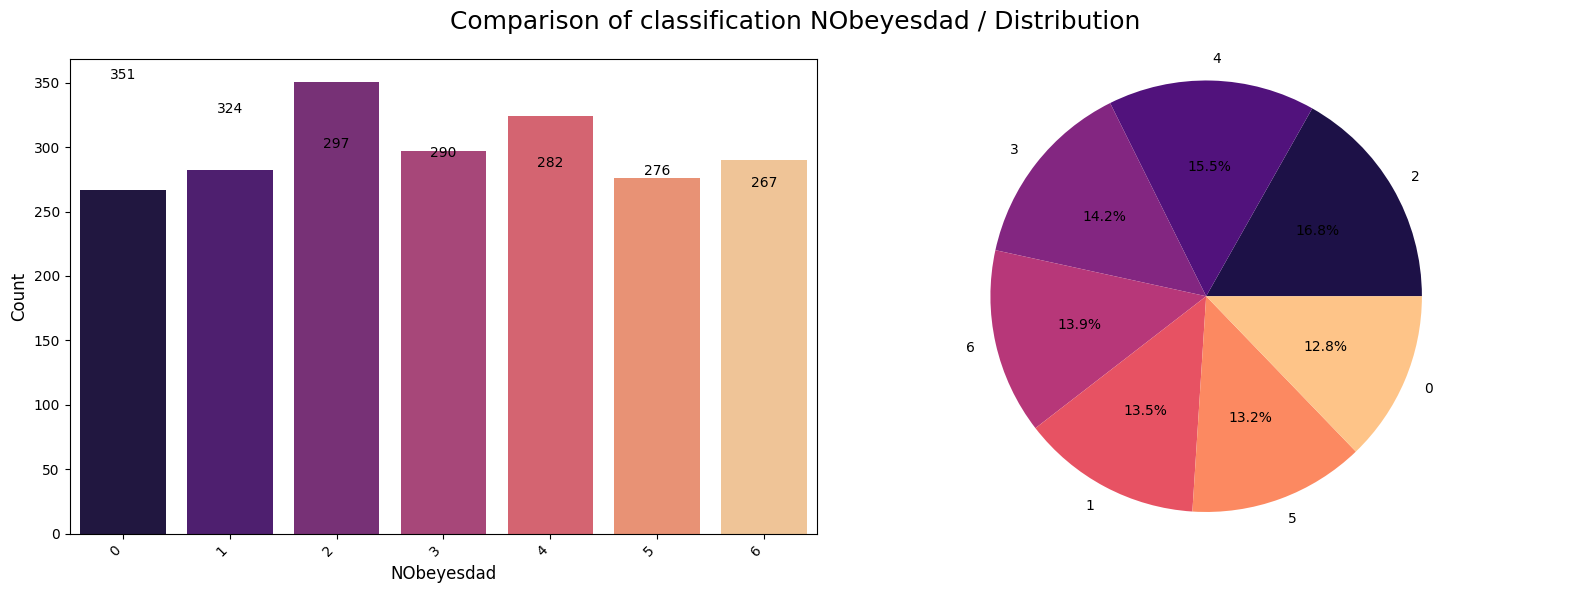

In [212]:
plot_distribution(junto, 'NObeyesdad')

<ipython-input-211-893cbd5a4c12>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="magma", ax=ax1)
<ipython-input-211-893cbd5a4c12>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


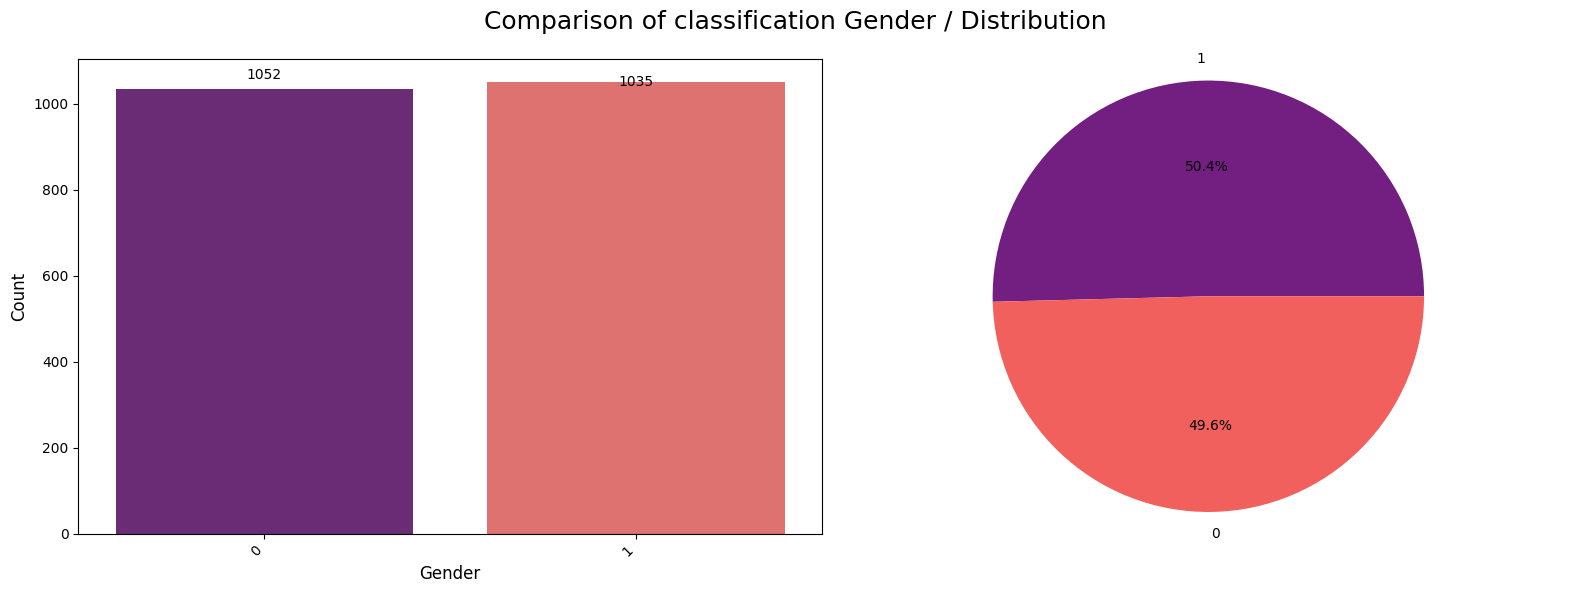

<ipython-input-211-893cbd5a4c12>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="magma", ax=ax1)
<ipython-input-211-893cbd5a4c12>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


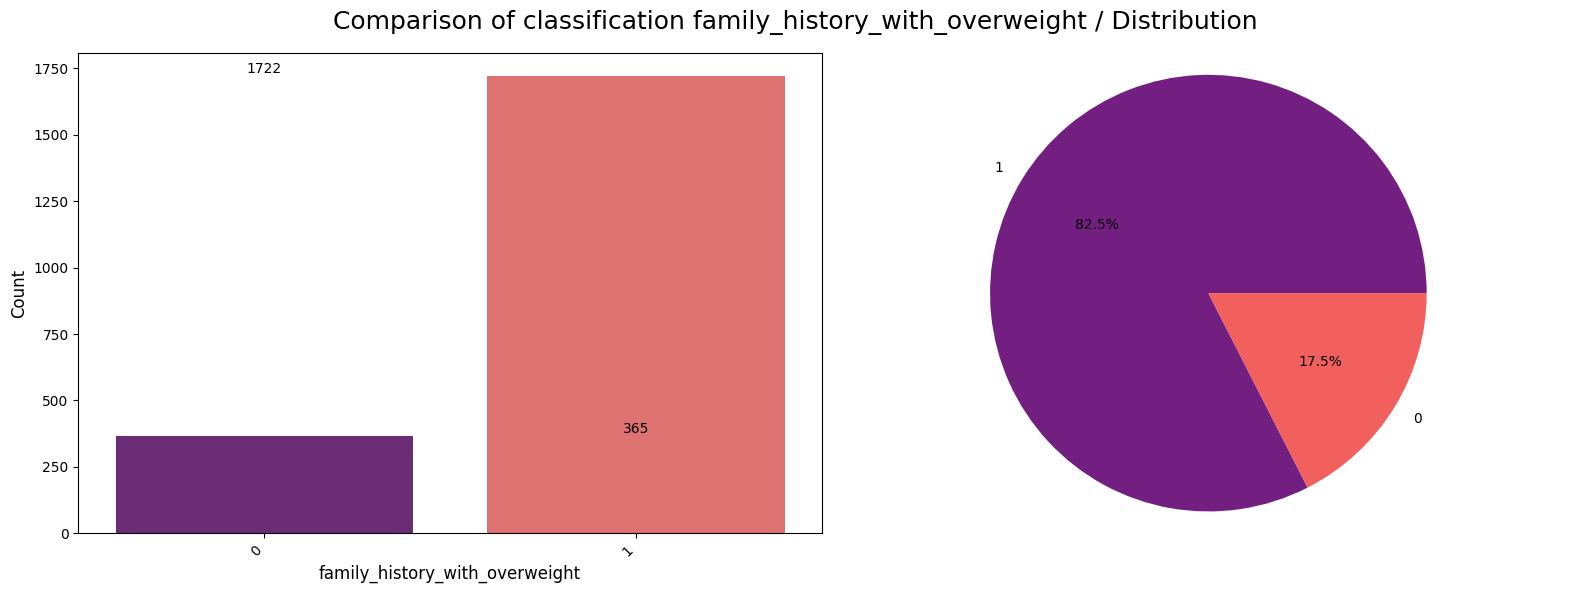

<ipython-input-211-893cbd5a4c12>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="magma", ax=ax1)
<ipython-input-211-893cbd5a4c12>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


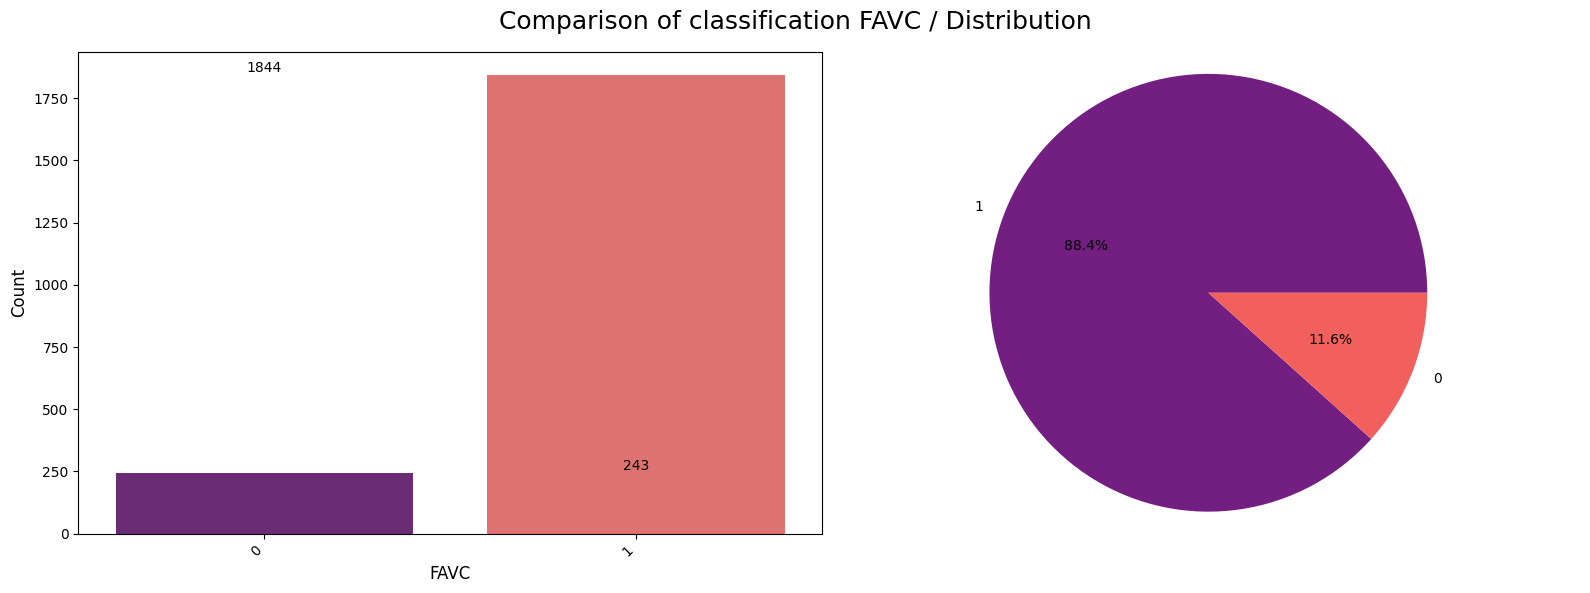

<ipython-input-211-893cbd5a4c12>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="magma", ax=ax1)
<ipython-input-211-893cbd5a4c12>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


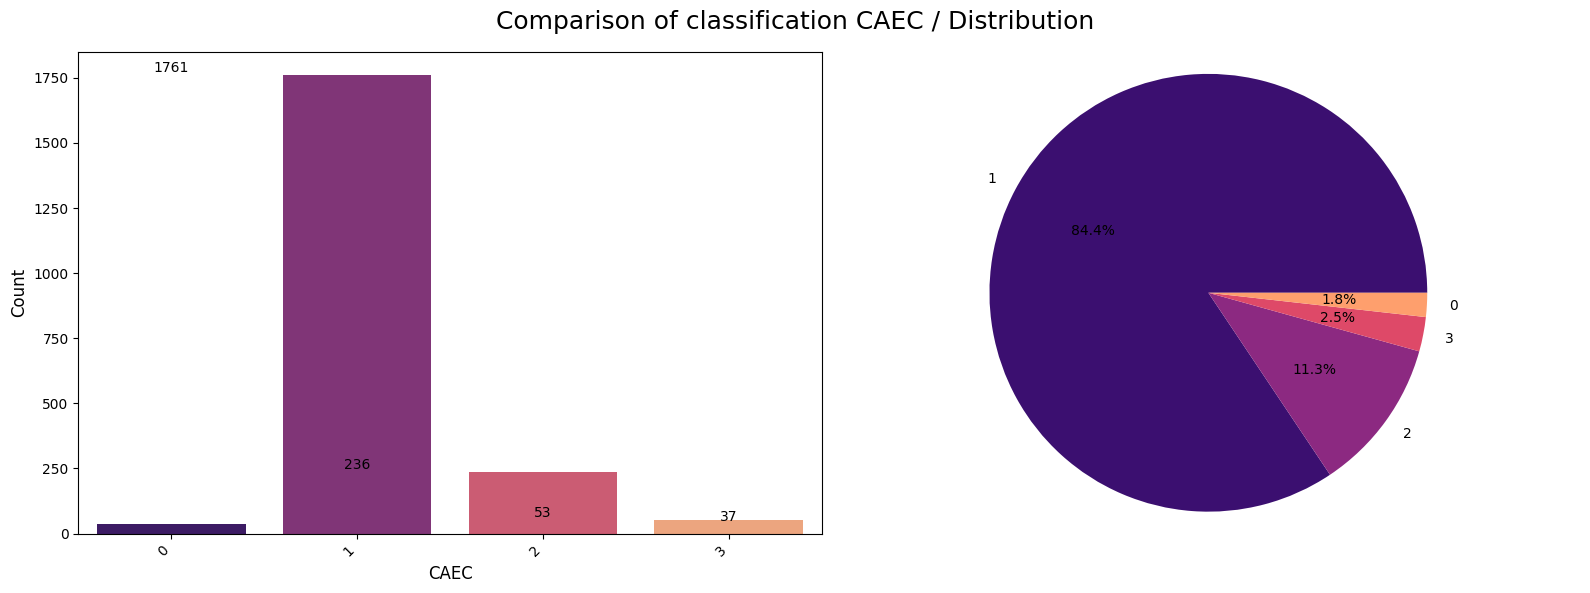

<ipython-input-211-893cbd5a4c12>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="magma", ax=ax1)
<ipython-input-211-893cbd5a4c12>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


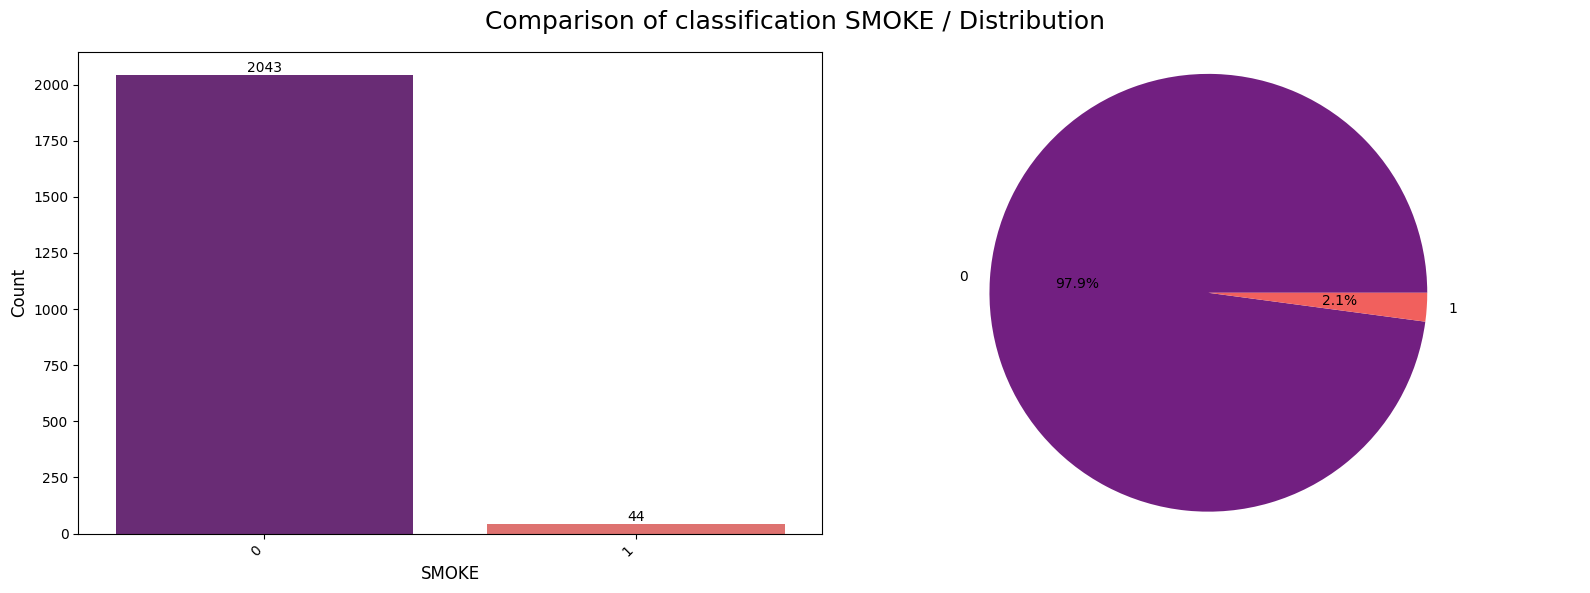

<ipython-input-211-893cbd5a4c12>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="magma", ax=ax1)
<ipython-input-211-893cbd5a4c12>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


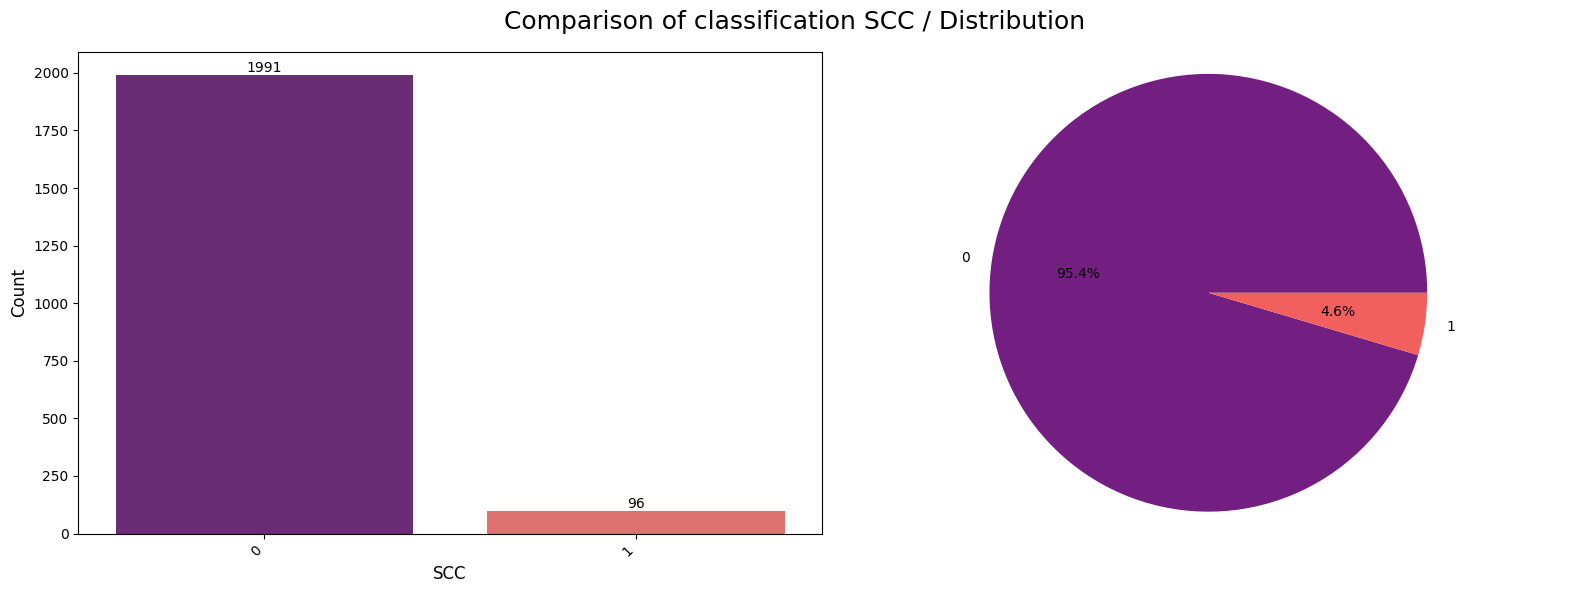

<ipython-input-211-893cbd5a4c12>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="magma", ax=ax1)
<ipython-input-211-893cbd5a4c12>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


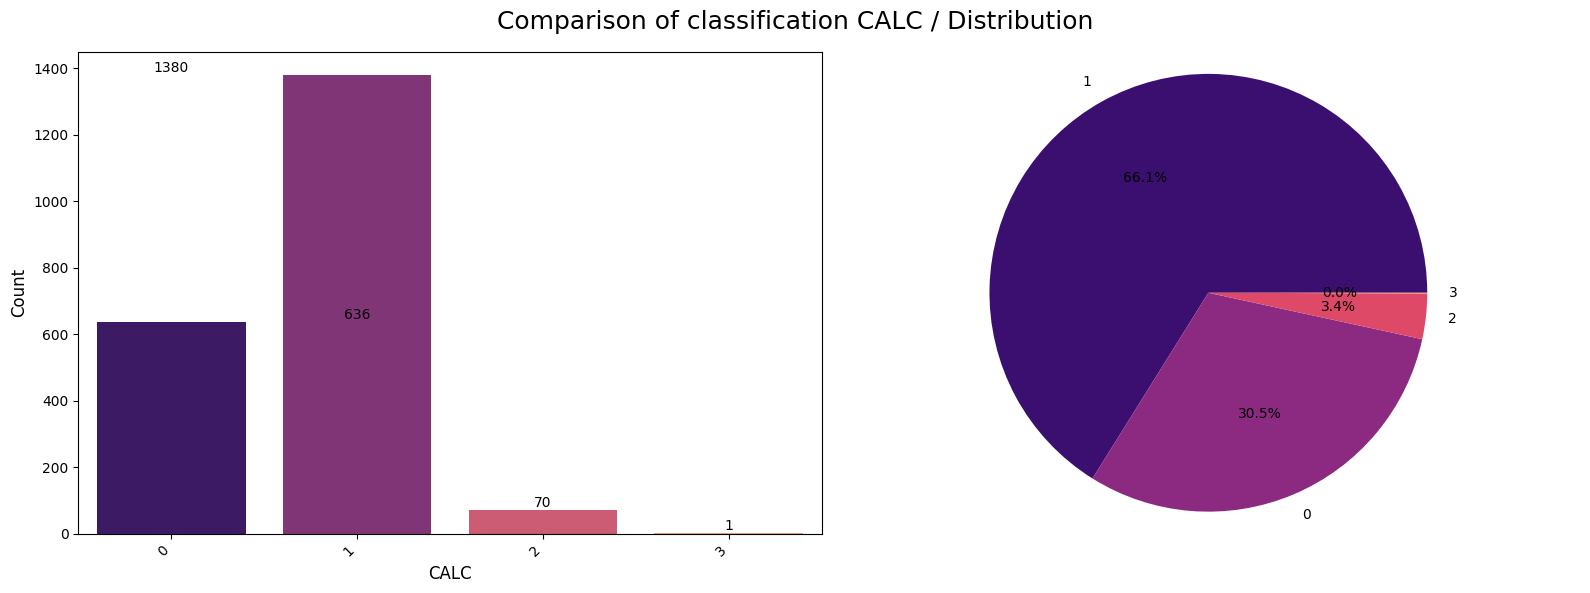

<ipython-input-211-893cbd5a4c12>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="magma", ax=ax1)
<ipython-input-211-893cbd5a4c12>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


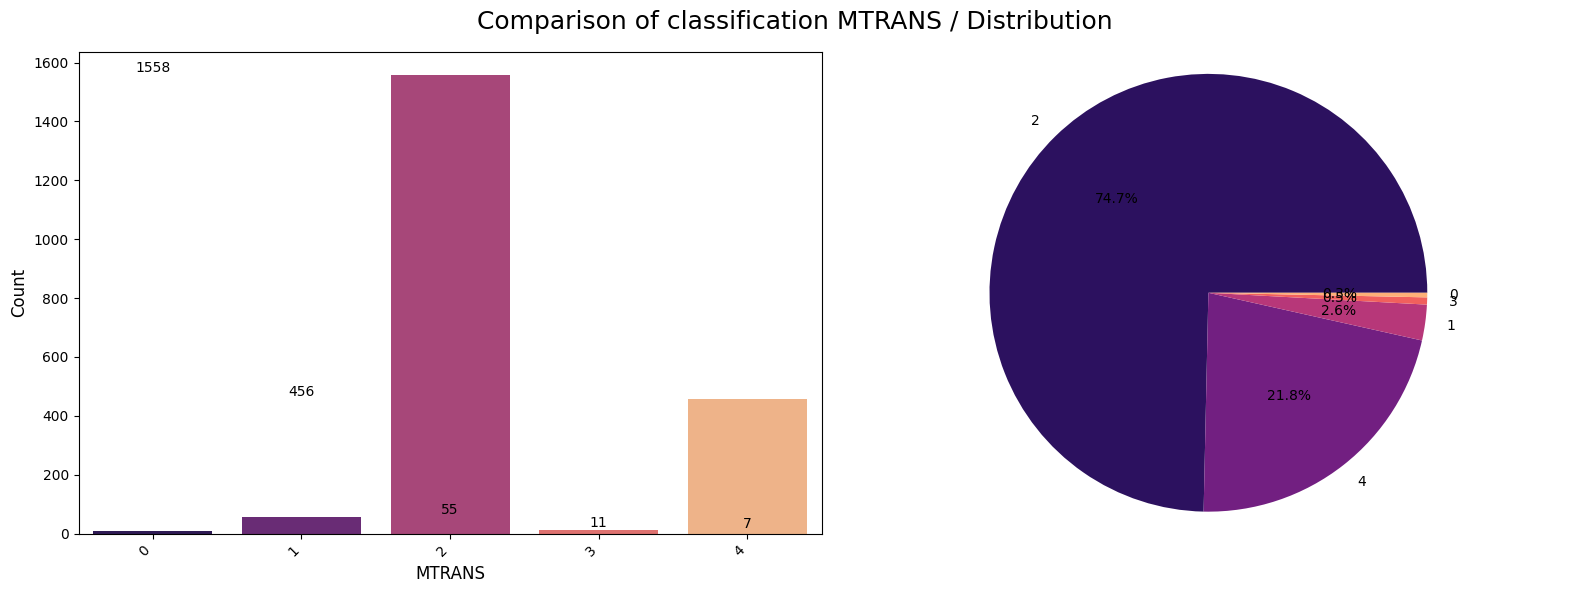

In [213]:
for column in categorical_vars:
    plot_distribution(junto, column)

# Plotando Histogramas e Gráficos de Densidade para Variáveis ​​Contínuas

# Modelagem e Desenvolvimento

In [214]:
# Realiza separação do dados de treino e teste
X = junto.drop('NObeyesdad', axis=1)
y = junto['NObeyesdad']

In [216]:
# Realiza o treinamento e teste dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
xgbc = XGBClassifier(random_state=42, device='cuda')

In [218]:
# Após testes a tecnica de XGBClassifier se mostrou o melhor em prever a estimativa
xgbc.fit(X_train, y_train)
pred = xgbc.predict(X_test)
score = accuracy_score(pred, y_test)
print('XGBClassifier', ": {}%".format(round(score*100, 2)))
report = classification_report(pred, y_test)
print(report)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:05:20] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


XGBClassifier : 96.65%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        59
           1       0.87      0.91      0.89        58
           2       0.99      1.00      0.99        69
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.96      0.91      0.94        58
           6       1.00      0.98      0.99        50

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [219]:
# Cria função 'machine' que facilita na repetição de parte do código
def machine(nome, modelo):
  modelo.fit(X_train, y_train)
  pred = modelo.predict(X_test)
  score = accuracy_score(pred, y_test)
  print(f'{nome} {round(score*100, 2)}')
  report = classification_report(pred, y_test)
  print(report)

xgbc = XGBClassifier(random_state=42, device='cuda')
xgb = GradientBoostingClassifier()
log = LogisticRegression()
dtr = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC(C=0.9)
knn = KNeighborsClassifier(n_neighbors=1)
red = MLPClassifier(hidden_layer_sizes=(100, 50, 20),activation='logistic')
mnb = MultinomialNB()
gbm = GradientBoostingClassifier()

In [220]:
# Celulas a baixo colocadas em ordem de maior porcentagem de acerto na estimetiva

In [230]:
# Gradient Boosting Classifier
machine('Gradient Boosting Machines (GBM)', gbm)

Gradient Boosting Machines (GBM) 95.93
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.87      0.88      0.88        60
           2       0.99      0.99      0.99        70
           3       0.98      1.00      0.99        63
           4       1.00      1.00      1.00        60
           5       0.95      0.91      0.93        57
           6       1.00      0.98      0.99        50

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [223]:
# Floresta Aleatória
machine('Random Forests',rfc)

Random Forests 95.22
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        57
           1       0.90      0.85      0.87        65
           2       0.97      1.00      0.99        68
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.87      0.92      0.90        52
           6       0.98      0.92      0.95        52

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [224]:
# Árvores de Decisão
machine('Árvores de Decisão', dtr)

Árvores de Decisão 91.39
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.70      0.86      0.77        50
           2       0.93      0.94      0.94        69
           3       0.97      0.95      0.96        65
           4       1.00      1.00      1.00        60
           5       0.87      0.81      0.84        59
           6       0.96      0.92      0.94        51

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.92      0.91      0.92       418



In [225]:
# K — Nearest Neighbors (K-vizinhos mais próximos)
machine('KNN (K-Nearest Neighbors)', knn)

KNN (K-Nearest Neighbors) 89.71
              precision    recall  f1-score   support

           0       0.98      0.84      0.91        69
           1       0.52      0.91      0.67        35
           2       0.93      0.98      0.96        66
           3       1.00      1.00      1.00        64
           4       1.00      0.98      0.99        61
           5       0.89      0.77      0.82        64
           6       0.96      0.80      0.87        59

    accuracy                           0.90       418
   macro avg       0.90      0.90      0.89       418
weighted avg       0.92      0.90      0.90       418



In [226]:
# Rede neural com Perceptron Multicamadas
machine('Rede neural',red)

Rede neural 83.97
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        71
           1       0.72      0.83      0.77        53
           2       0.84      0.91      0.87        65
           3       1.00      0.97      0.98        66
           4       1.00      1.00      1.00        60
           5       0.65      0.68      0.67        53
           6       0.61      0.60      0.61        50

    accuracy                           0.84       418
   macro avg       0.83      0.83      0.83       418
weighted avg       0.85      0.84      0.84       418



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [227]:
# Regressão Logística
machine('Regressão Logística',log)

Regressão Logística 66.51
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        59
           1       0.46      0.55      0.50        51
           2       0.59      0.56      0.57        73
           3       0.81      0.93      0.87        56
           4       1.00      0.90      0.94        67
           5       0.42      0.47      0.44        49
           6       0.53      0.41      0.46        63

    accuracy                           0.67       418
   macro avg       0.66      0.66      0.66       418
weighted avg       0.67      0.67      0.67       418



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [228]:
# Naive Bayes (tabela de probabilidades)
machine('Multinomial Naive Bayes', mnb)

Multinomial Naive Bayes 60.05
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        64
           1       0.44      0.69      0.54        39
           2       0.40      0.34      0.37        83
           3       0.70      0.73      0.71        62
           4       1.00      0.88      0.94        68
           5       0.31      0.53      0.39        32
           6       0.47      0.33      0.39        70

    accuracy                           0.60       418
   macro avg       0.60      0.61      0.59       418
weighted avg       0.62      0.60      0.60       418



In [229]:
# Máquinas de vetores de suporte
machine('SVM (Support Vector Machines)', svm)

SVM (Support Vector Machines) 51.67
              precision    recall  f1-score   support

           0       0.92      0.66      0.77        82
           1       0.30      0.39      0.34        46
           2       0.37      0.46      0.41        57
           3       0.64      0.64      0.64        64
           4       0.45      0.53      0.49        51
           5       0.33      0.55      0.41        33
           6       0.65      0.38      0.48        85

    accuracy                           0.52       418
   macro avg       0.52      0.51      0.50       418
weighted avg       0.57      0.52      0.53       418

